Dados

https://www.kaggle.com/datasets/shantanugarg274/sales-dataset

https://www.kaggle.com/code/easyice/e-d-a-and-profit-prediction-sales-dataset

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Sales Dataset.csv")

In [4]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [5]:
df.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08
1193,B-25068,914,163,13,Office Supplies,Markers,UPI,2024-10-26,Andrea Hill,Illinois,Chicago,2024-10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [7]:
df.shape

(1194, 12)

In [8]:
df.isnull()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,False,False,False,False,False,False,False,False,False,False,False,False
1190,False,False,False,False,False,False,False,False,False,False,False,False
1191,False,False,False,False,False,False,False,False,False,False,False,False
1192,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

<Axes: >

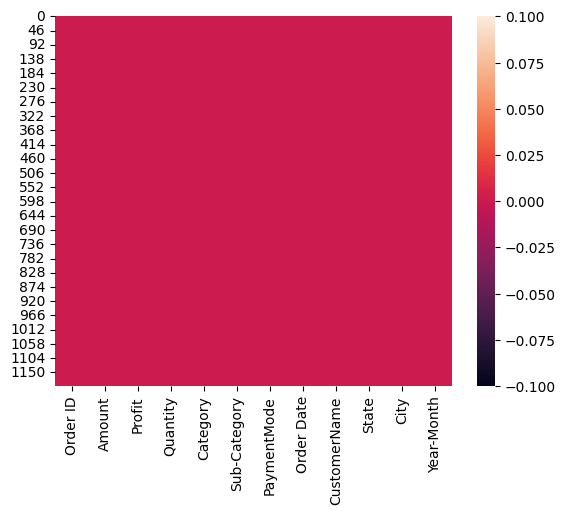

In [10]:
sns.heatmap(df.isnull())

In [15]:
cat_col = [col for col in df.columns if df[col].dtype=='object']
cat_col

['Order ID',
 'Category',
 'Sub-Category',
 'PaymentMode',
 'Order Date',
 'CustomerName',
 'State',
 'City',
 'Year-Month']

In [16]:
num_col = [col for col in df.columns if df[col].dtypes !='object']
num_col

['Amount', 'Profit', 'Quantity']

<Axes: xlabel='Amount', ylabel='Count'>

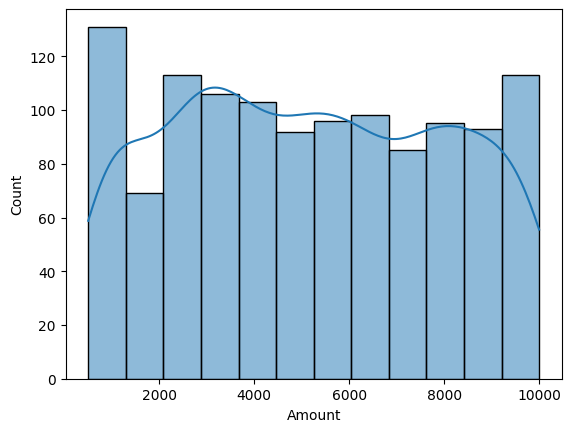

In [13]:
sns.histplot(df['Amount'], kde=True)

<Axes: xlabel='Profit', ylabel='Count'>

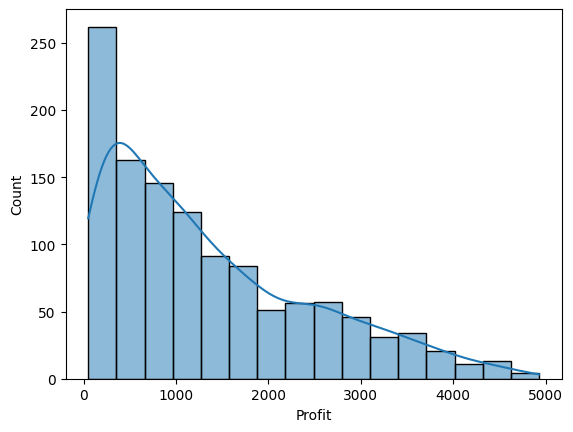

In [17]:
sns.histplot(df['Profit'], kde=True)

<Axes: xlabel='Quantity', ylabel='Count'>

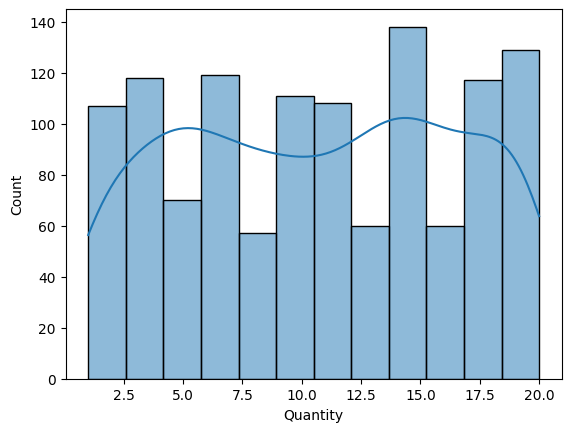

In [18]:
sns.histplot(df['Quantity'], kde=True)

<Axes: >

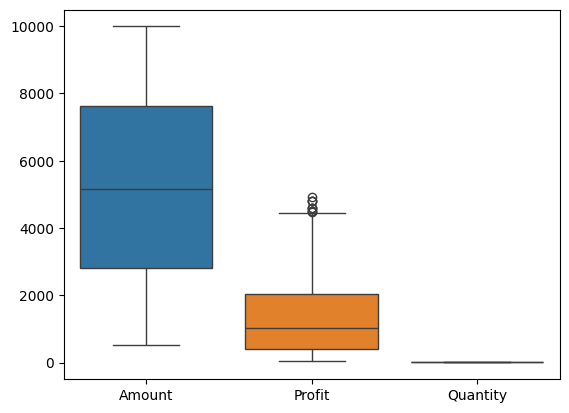

In [19]:
sns.boxplot(df)

In [23]:
def df_limpar(column, df):
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IRQ = Q3 - Q1
    
    limite_inferior = Q1 - (1.5 * IRQ)
    limite_superior = Q3 + (1.5 * IRQ)
    
    df_limpo = df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]
    
    return df_limpo

In [24]:
df_limpo = df_limpar('Profit', df)

<Axes: ylabel='Profit'>

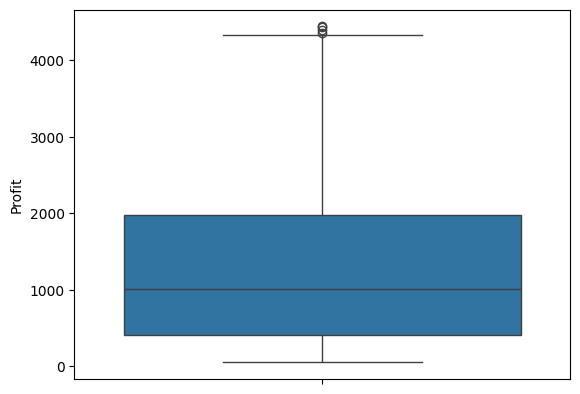

In [25]:
sns.boxplot(df_limpo['Profit'])

<Axes: >

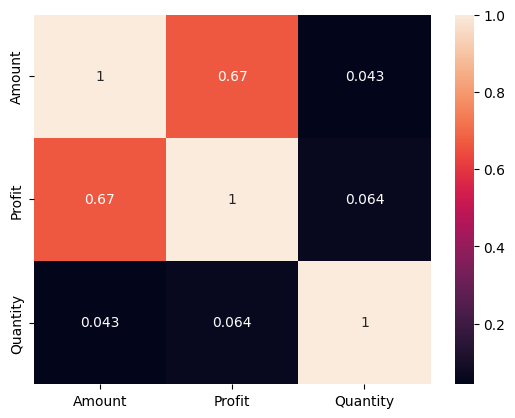

In [28]:
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True)

<Axes: xlabel='Year-Month', ylabel='Amount'>

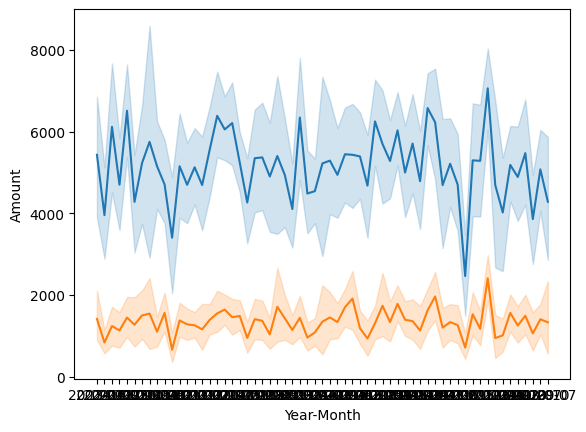

In [35]:
sns.lineplot(data=df, x='Year-Month',y='Amount')
sns.lineplot(data=df, x='Year-Month', y='Profit')

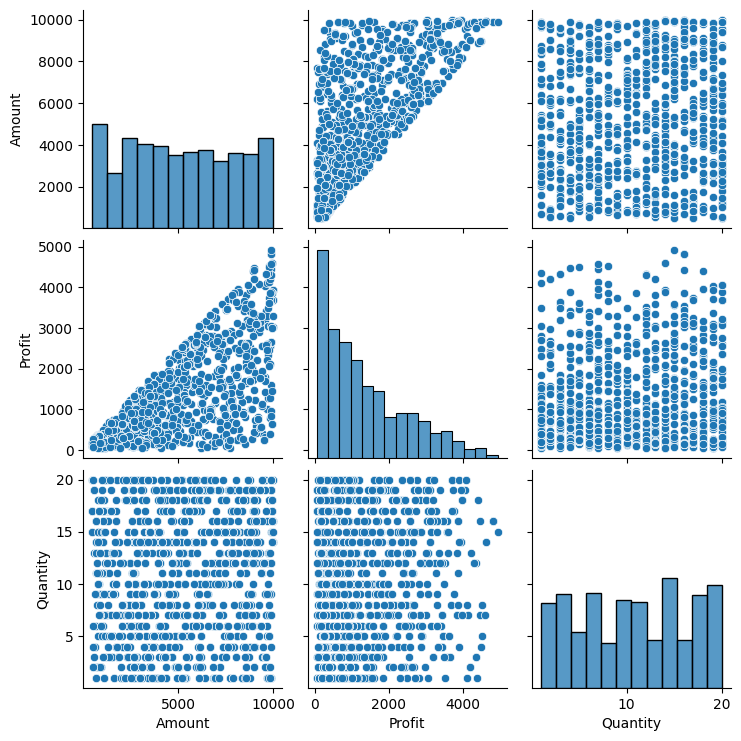

In [29]:
sns.pairplot(df)

In [30]:
df.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


<Axes: xlabel='Amount', ylabel='Count'>

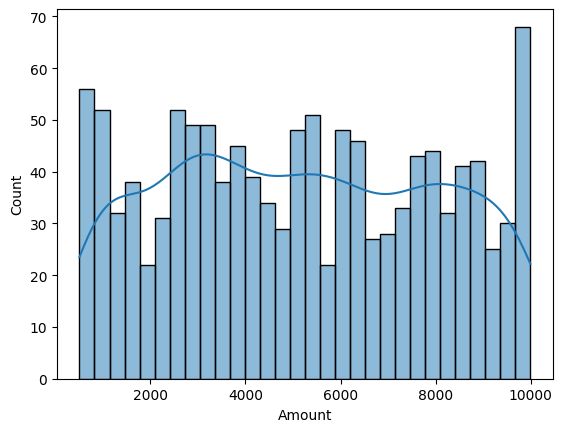

In [31]:
sns.histplot(data= df, x='Amount', kde=True, bins= 30)

<Axes: xlabel='Profit', ylabel='Density'>

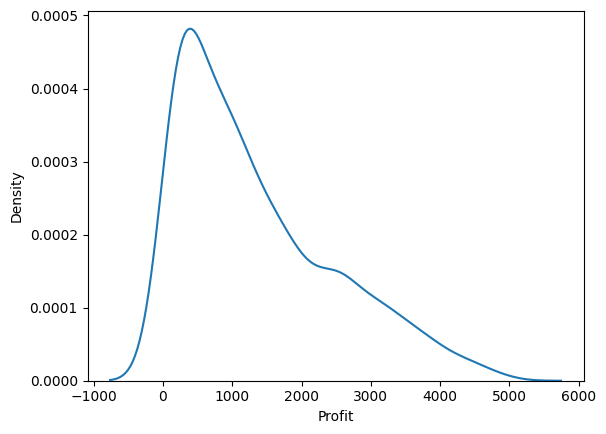

In [32]:
sns.kdeplot(data=df, x='Profit')

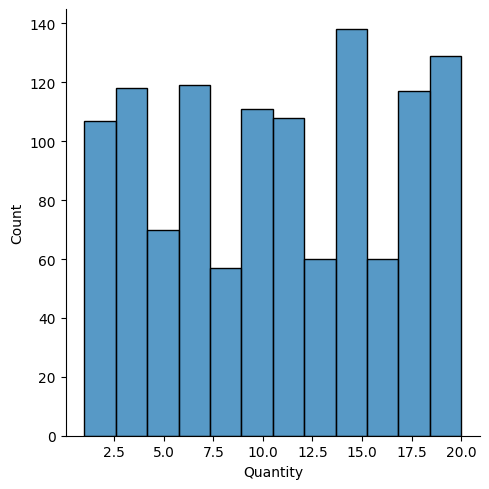

In [33]:
sns.displot(data=df, x='Quantity')

<Axes: xlabel='Amount', ylabel='Profit'>

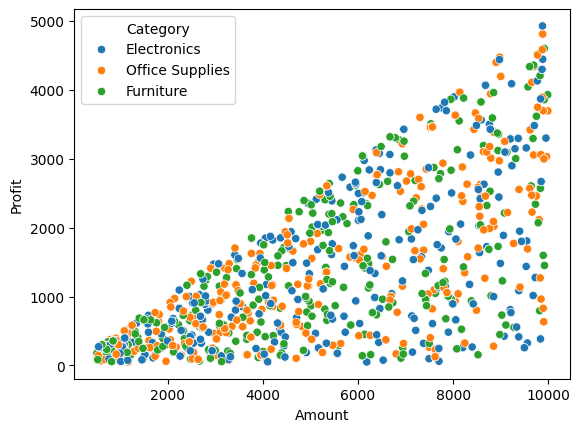

In [34]:
sns.scatterplot(data=df, x='Amount', y='Profit', hue='Category')

<Axes: xlabel='Category'>

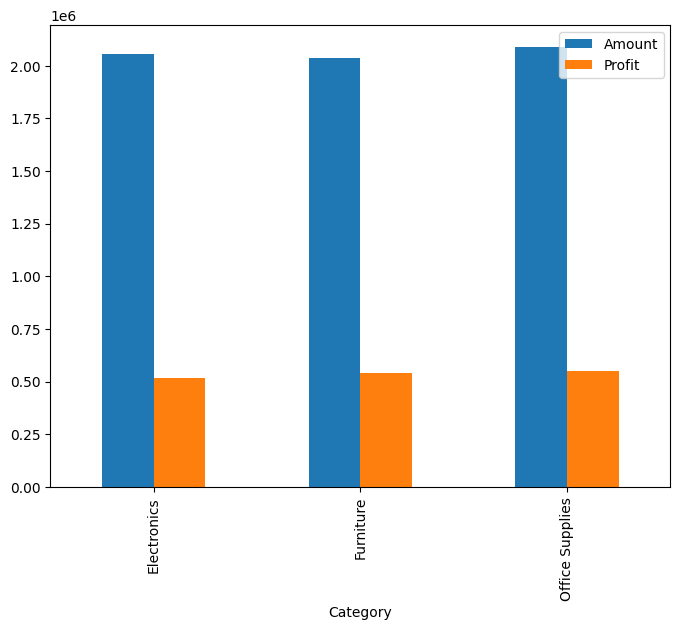

In [37]:
df.groupby('Category')[['Amount', 'Profit']].sum().plot(kind='bar', figsize=(8,6))

<Axes: ylabel='Sub-Category'>

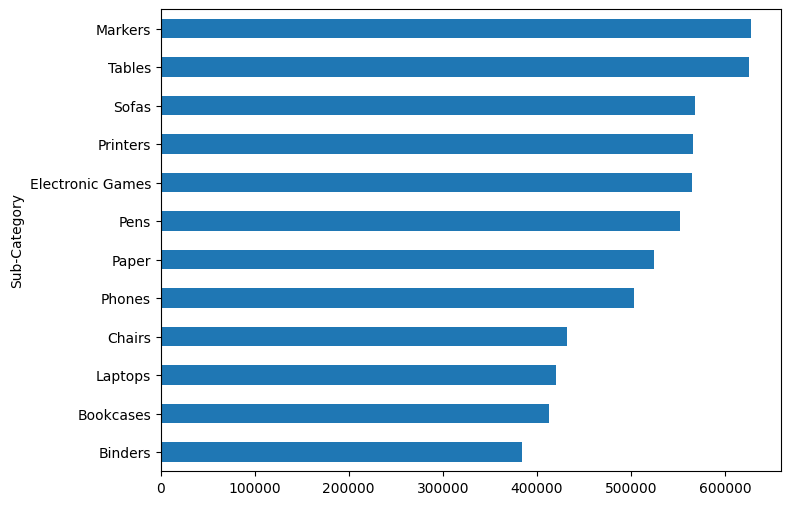

In [38]:
df.groupby('Sub-Category')['Amount'].sum().sort_values().plot(kind='barh', figsize=(8,6))

<Axes: xlabel='Quantity', ylabel='Count'>

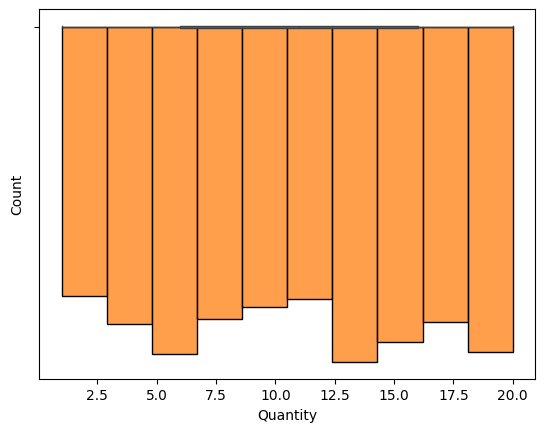

In [40]:
sns.boxplot(data=df, x='Quantity')
sns.histplot(df['Quantity'], bins=10)

<Axes: xlabel='Amount', ylabel='Count'>

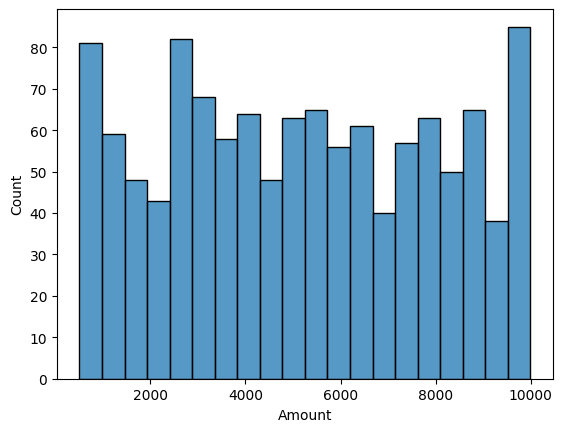

In [41]:
sns.histplot(df['Amount'], bins=20)

<Axes: ylabel='State'>

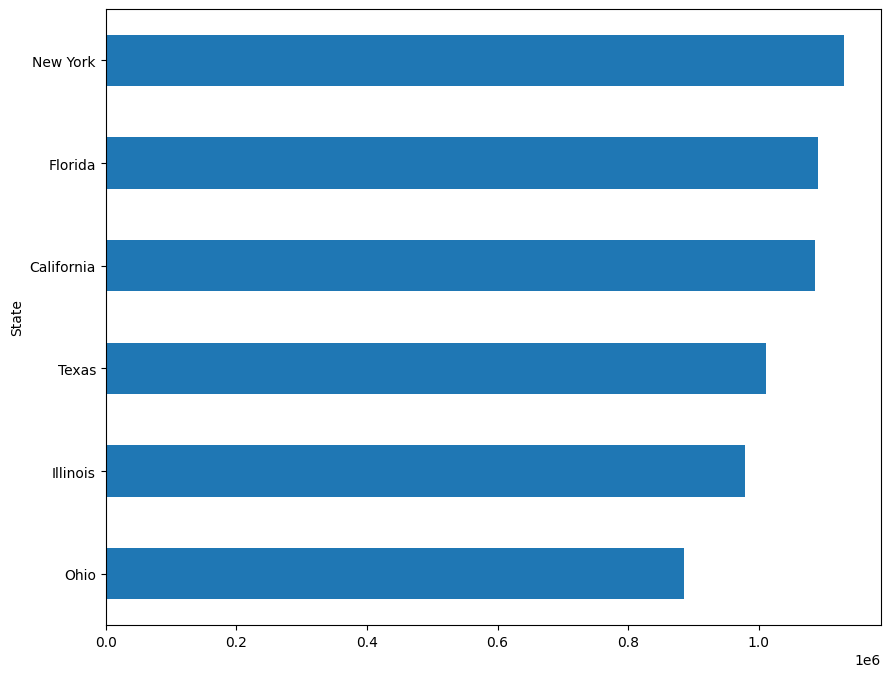

In [43]:
df.groupby('State')['Amount'].sum().sort_values().plot(kind='barh', figsize=(10,8))

<Axes: ylabel='State'>

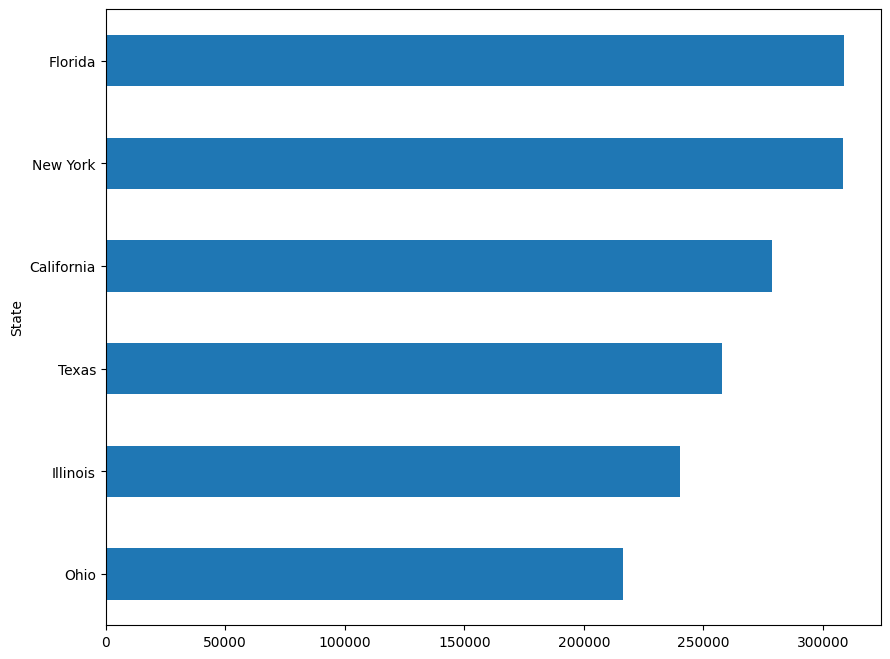

In [45]:
df.groupby('State')['Profit'].sum().sort_values().plot(kind='barh', figsize=(10,8))

Text(0.5, 0, 'Cidade')

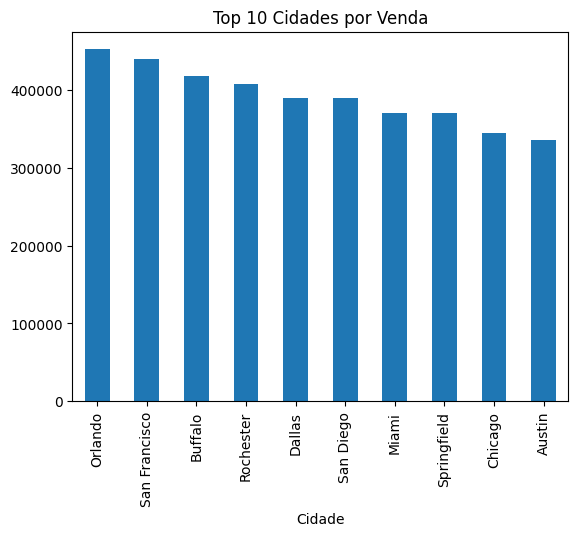

In [46]:
top_cidade = df.groupby('City')['Amount'].sum().nlargest(10)
ax = top_cidade.plot(kind='bar', title='Top 10 Cidades por Venda')
ax.set_xlabel('Cidade')

<Axes: xlabel='PaymentMode', ylabel='count'>

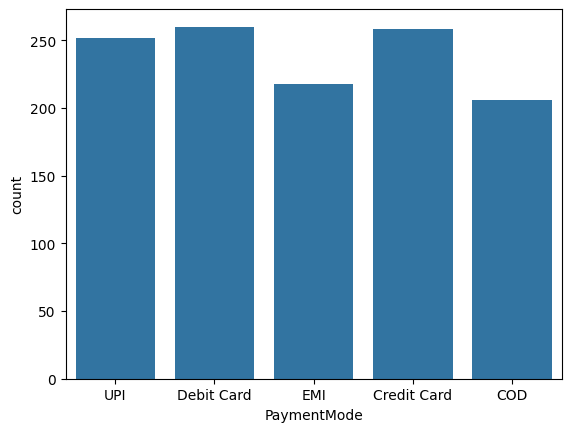

In [47]:
sns.countplot(data=df, x='PaymentMode')

Text(0, 0.5, 'Nome dos Clientes')

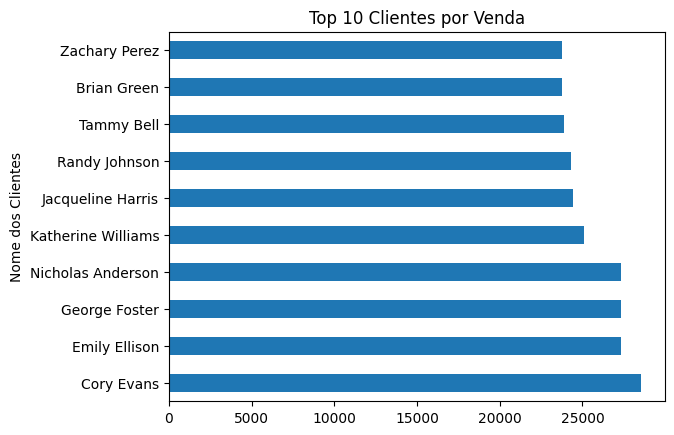

In [48]:
top_nome = df.groupby('CustomerName')['Amount'].sum().nlargest(10)
ax = top_nome.plot(kind='barh', title='Top 10 Clientes por Venda')
ax.set_ylabel('Nome dos Clientes')

<Axes: xlabel='Year-Month'>

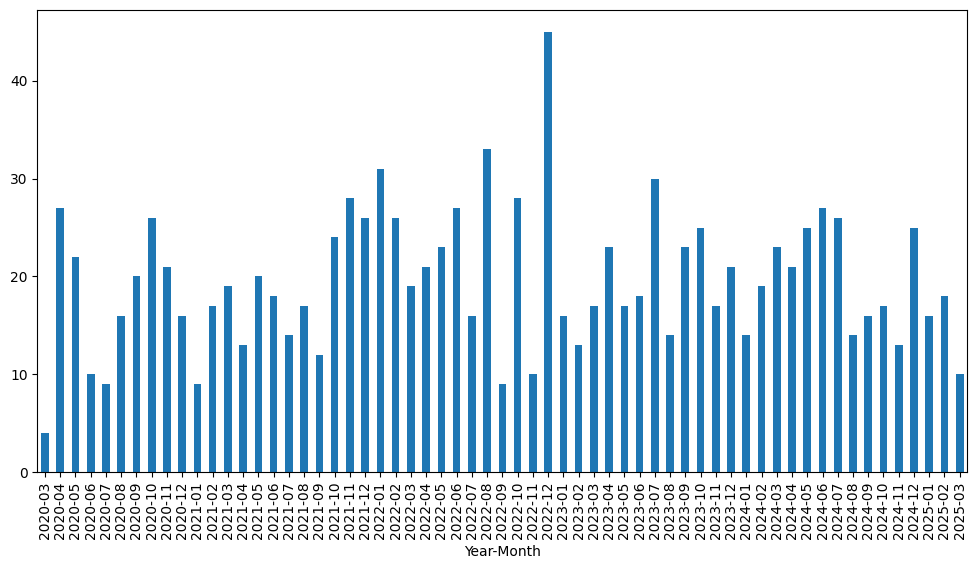

In [49]:
df['Order Count'] = 1
df.groupby('Year-Month')['Order Count'].count().plot(kind='bar', figsize=(12, 6))

C:\Users\Sandra\AppData\Local\Temp\ipykernel_2836\3322278986.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.year, y='Profit', data=df, ci=None)


<Axes: xlabel='Order Date', ylabel='Profit'>

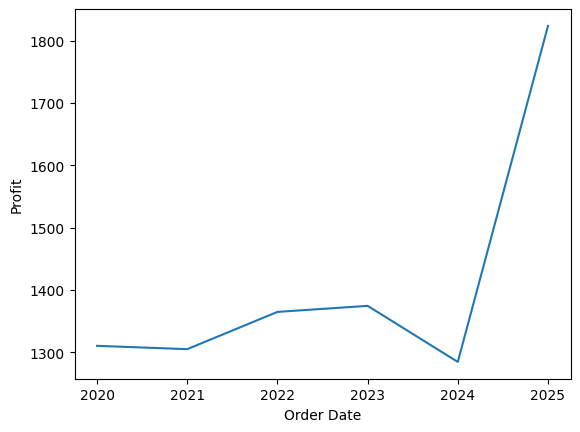

In [50]:
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.year, y='Profit', data=df, ci=None)

<Axes: xlabel='Order Date', ylabel='Profit'>

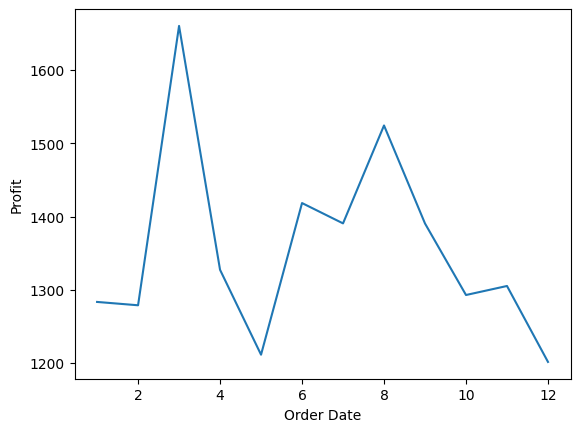

In [51]:
sns.lineplot(data=df, x=pd.to_datetime(df['Order Date']).dt.month, y='Profit', errorbar=None)

<Axes: xlabel='Order Date', ylabel='Profit'>

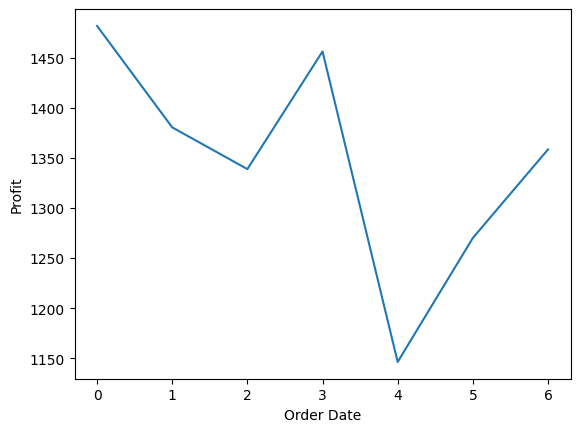

In [52]:
sns.lineplot(data=df, x=pd.to_datetime(df['Order Date']).dt.dayofweek,y='Profit', errorbar=None)

<Axes: xlabel='Order Date', ylabel='Profit'>

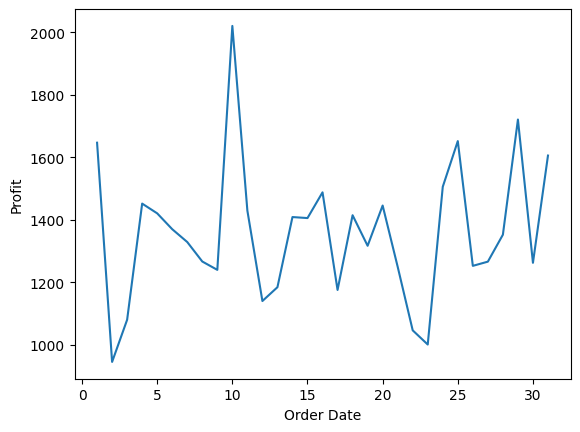

In [53]:
sns.lineplot(data=df, x=pd.to_datetime(df['Order Date']).dt.day, y='Profit', errorbar=None)

<Axes: xlabel='Order Date', ylabel='Profit'>

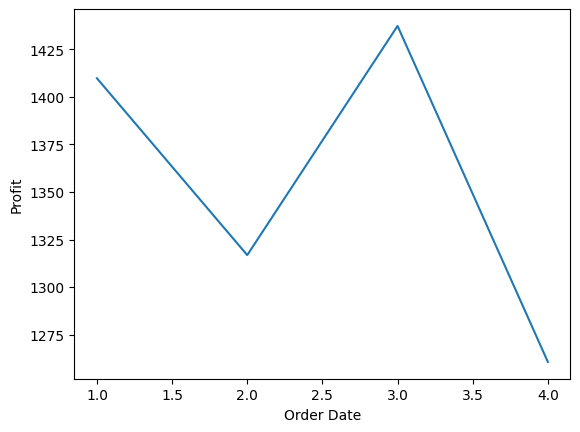

In [54]:
sns.lineplot(data=df, x=pd.to_datetime(df['Order Date']).dt.quarter, y='Profit', errorbar=None)

In [55]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month', 'Order Count'],
      dtype='object')

In [57]:
model_data = df.drop(['Order ID', 'Order Date', 'CustomerName', 'Year-Month'], axis=1)

In [58]:
model_data.head()

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,State,City,Order Count
0,9726,1275,5,Electronics,Electronic Games,UPI,Florida,Miami,1
1,9726,1275,5,Electronics,Electronic Games,UPI,Illinois,Chicago,1
2,9726,1275,5,Electronics,Electronic Games,UPI,New York,Buffalo,1
3,4975,1330,14,Electronics,Printers,UPI,Florida,Miami,1
4,4975,1330,14,Electronics,Printers,UPI,Illinois,Chicago,1


In [59]:
X = model_data.drop('Profit', axis=1)
y = model_data.Profit

In [62]:
X.head()

,Amount,Quantity,Category,Sub-Category,PaymentMode,State,City,Order Count
0,9726,5,Electronics,Electronic Games,UPI,Florida,Miami,1
1,9726,5,Electronics,Electronic Games,UPI,Illinois,Chicago,1
2,9726,5,Electronics,Electronic Games,UPI,New York,Buffalo,1
3,4975,14,Electronics,Printers,UPI,Florida,Miami,1
4,4975,14,Electronics,Printers,UPI,Illinois,Chicago,1


In [63]:
y.head()

0    1275
1    1275
2    1275
3    1330
4    1330
Name: Profit, dtype: int64

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
data = df.values
data

array([['B-26776', 9726, 1275, ..., 'Miami', '2023-06', 1],
       ['B-26776', 9726, 1275, ..., 'Chicago', '2024-12', 1],
       ['B-26776', 9726, 1275, ..., 'Buffalo', '2021-07', 1],
       ...,
       ['B-26298', 2082, 642, ..., 'Austin', '2022-12', 1],
       ['B-26298', 2082, 642, ..., 'Buffalo', '2020-08', 1],
       ['B-25068', 914, 163, ..., 'Chicago', '2024-10', 1]], dtype=object)

In [69]:
x, y = data[:, :-1], data[:,-1]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [71]:
model = LinearRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'B-26672'